# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.   Load Dataset

In [19]:
file_url = '../data/raw/train.csv'

In [20]:
df = pd.read_csv(file_url)

/var/folders/qz/l2xk6fnn5p399gdvg2snh00c0000gn/T/ipykernel_4636/154688912.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_url)


### 2. Explore Dataset

In [21]:
pd.set_option('display.max_columns', None)
df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [5]:
df.shape

(56091, 64)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [7]:
df.describe(include='all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,56091,56091,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,55799,55993,51401.0,56091.000000,56091.000000,56091.000000,56091.000000,56091,17036.000000,51901.000000,50010.000000,50010.000000,50010.000000,50010.000000,46627.000000,46403.000000,50010.000000,50010.000000,25298.000000,1386.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56053.000000,56047.000000,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091,56091.000000
unique,358,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,38,80.0,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23929,NaN
top,Army,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jr,7-Jun,1.0,NaN,NaN,NaN,NaN,all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06dc8dc2-888e-4941-9106-4798cddfb9d2,NaN
freq,209,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14923,5578,2328.0,NaN,NaN,NaN,NaN,56091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,10.848740,20.337819,32.926708,47.152627,0.579696,41.412401,85.319160,0.426941,15.677613,45.616480,0.227449,1.876426,1.715305,37.437150,NaN,NaN,NaN,0.775720,89.328297,4.242936,2014.536557,NaN,53.456363,0.932305,28.066087,47.052490,14.494741,40.523115,0.564080,0.323633,3.836553,4.311618,0.863570,33.254690,103.319021,103.476636,1.438807,82.827595,-2.525068,-1.896939,-0.628129,-2.525672,16.973259,-2.083375,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,NaN,0.009556
std,NaN,NaN,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,9.356001,12.226129,36.870041,49.557538,0.268678,43.730858,85.130054,0.193498,21.584619,58.060609,0.190430,5.876399,2.080477,36.813143,NaN,NaN,NaN,1.333574,30.923798,4.610406,3.450911,NaN,27.641745,0.696625,30.144876,47.582825,17.538837,44.401559,0.190824,0.171453,7.943541,8.709568,0.230396,16.651343,10.163752,11.033215,1.064868,65.344533,7.586977,5.184468,4.280805,8.304955,10.623801,6.190166,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,NaN,0.097287
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,-6.792410,-39.021300,0.000000,2009.000000,NaN,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-102.186000,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,4.600000,14.800000,4.000000,7.000000,0.500000,5.000000,13.000000,0.375000,0.000000,1.000000,0.000000,0.000000,0.900000,19.400000,NaN,NaN,NaN,-0.170

In [32]:
# Assuming df is your DataFrame
nan_counts = df.isnull().sum()

# Filter to show only columns with NaN values
columns_with_nans = nan_counts[nan_counts > 0]

# Print the result
print(columns_with_nans)

yr                       292
ht                        98
num                     4690
Rec_Rank               39055
ast_tov                 4190
rimmade                 6081
rimmade_rimmiss         6081
midmade                 6081
midmade_midmiss         6081
rim_ratio               9464
mid_ratio               9688
dunksmade               6081
dunksmiss_dunksmade     6081
dunks_ratio            30793
pick                   54705
drtg                      44
adrtg                     44
dporpag                   44
stops                     44
bpm                       44
obpm                      44
dbpm                      44
gbpm                      44
mp                        38
ogbpm                     44
dgbpm                     44
oreb                      38
dreb                      38
treb                      38
ast                       38
stl                       38
blk                       38
pts                       38
dtype: int64


In [11]:
df.columns

Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id', 'drafted'],
      dtype='object')

### 3. Explore Target variable

In [8]:
target = 'drafted'

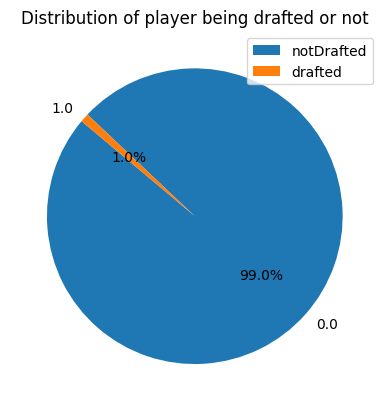

In [49]:
draftCount = df.drafted.value_counts().reset_index()
plt.pie(draftCount['count'], labels=draftCount['drafted'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of player being drafted or not')
plt.legend(labels=['notDrafted', 'drafted'])
plt.show()

The data here is imbalanced showing the majority of the college students not being selected as a NBA player. Out of total college student who are trying to get into NBA only 1% of them make it to the team.

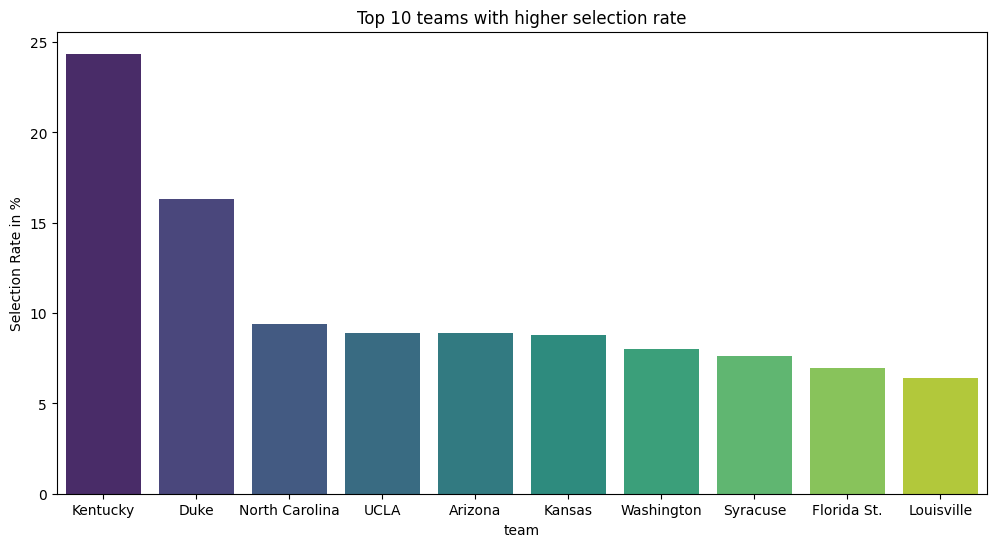

In [66]:
teamSelectionRate = df.groupby('team')['drafted'].mean() * 100
selectingTeam = teamSelectionRate.sort_values(ascending=False).reset_index()
selectingTeam.columns = ['team', 'selectionRate']
top5SelectingTeam = selectingTeam.head(10)

plt.figure(figsize=(12,6))
sns.barplot(top5SelectingTeam, x='team', y='selectionRate', palette='viridis', hue='team')
plt.ylabel('Selection Rate in %')
plt.title('Top 10 teams with higher selection rate')
plt.show()

Here, we can observe that the Kentucky team are one of those which have higher selection rate with about 24% into their team followed by Duke, North Carolina, UCLA and Arizona

In [78]:
np.sum([teamSelectionRate.values == 0])

np.int64(225)

In [83]:
teamSelectionRate[teamSelectionRate.values == 0]

team
Abilene Christian    0.0
Air Force            0.0
Akron                0.0
Alabama A&M          0.0
Alabama St.          0.0
                    ... 
Winston Salem St.    0.0
Winthrop             0.0
Wofford              0.0
Wright St.           0.0
Youngstown St.       0.0
Name: drafted, Length: 225, dtype: float64

So, according to this data some of the team doesn't even select the players and has 100% rejection rate

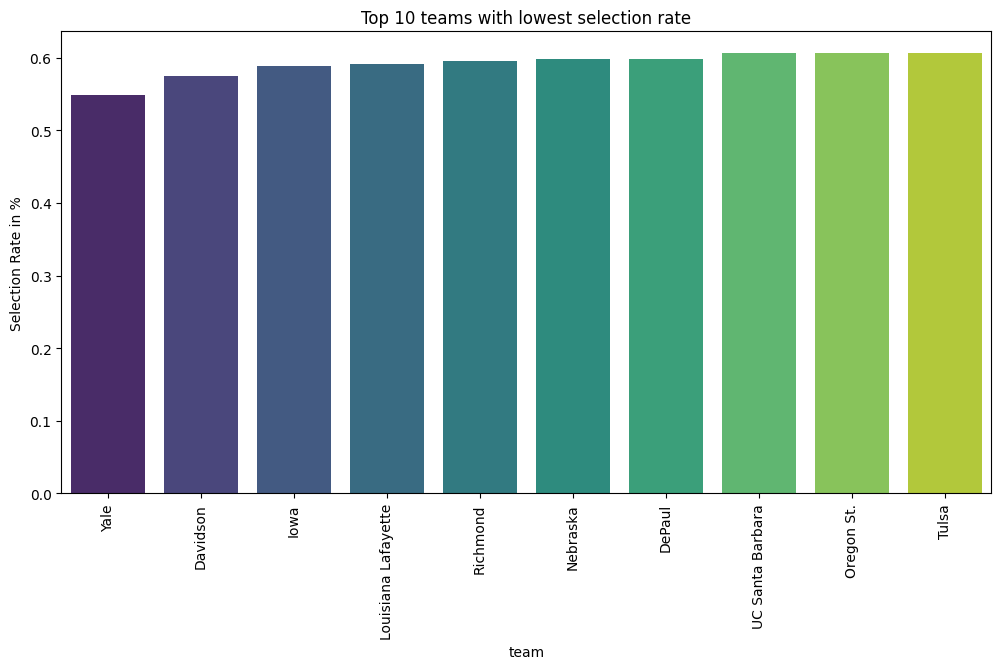

In [84]:
leastSelectionRateTeam = teamSelectionRate[teamSelectionRate.values > 0]
leastSelectingTeam = leastSelectionRateTeam.sort_values(ascending=True).reset_index()
leastSelectingTeam.columns = ['team', 'selectionRate']
least10SelectingTeam = leastSelectingTeam.head(10)

plt.figure(figsize=(12,6))
sns.barplot(least10SelectingTeam, x='team', y='selectionRate', palette='viridis', hue='team')
plt.ylabel('Selection Rate in %')
plt.title('Top 10 teams with lowest selection rate')
plt.xticks(rotation=90)
plt.show()

Some of the team with lowest selection rate rate are shown in the figure above with Yale being least among all the team that drafting players.

### 4. Explore Variables of Interest

/var/folders/qz/l2xk6fnn5p399gdvg2snh00c0000gn/T/ipykernel_4636/3920798700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(df['conf'],palette = 'Set1')


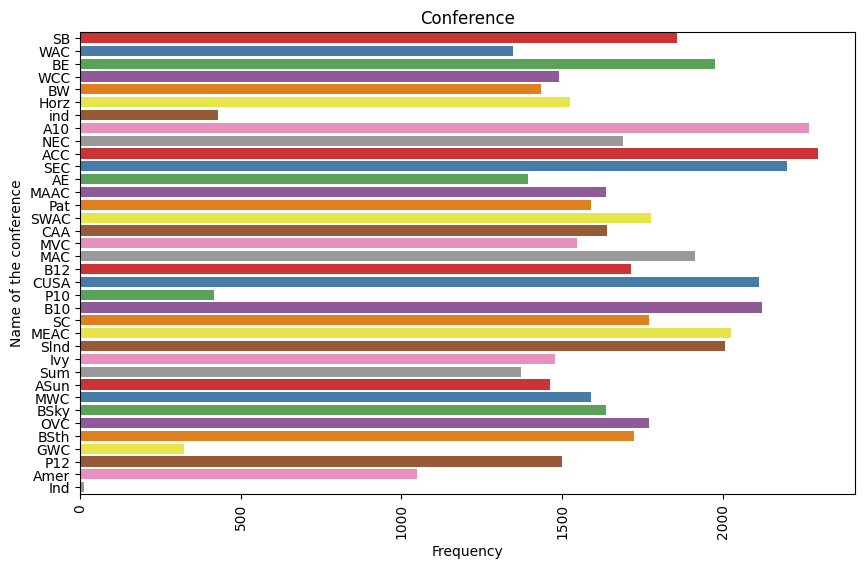

In [22]:
plt.figure(figsize=(10,6))
chart = sns.countplot(df['conf'],palette = 'Set1')
plt.title('Conference')
plt.xlabel('Frequency')
plt.ylabel('Name of the conference')
plt.xticks(rotation = 90)
plt.show()

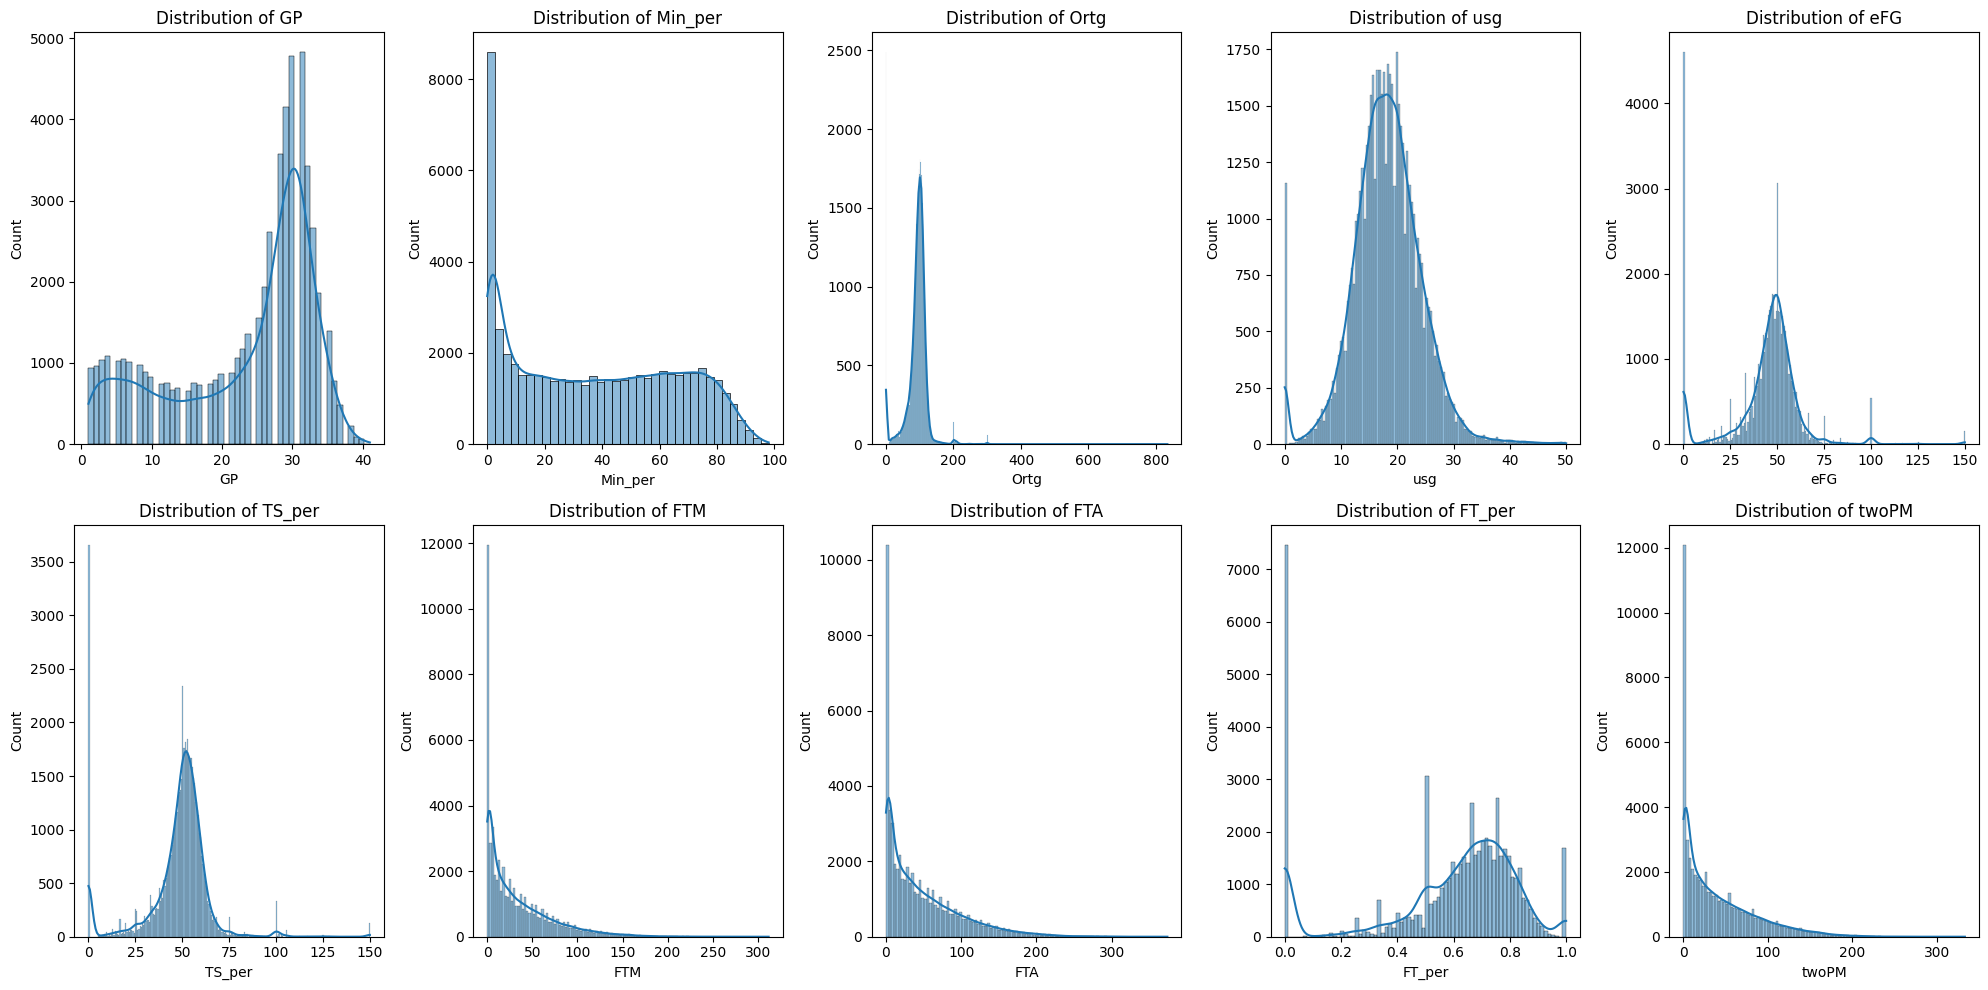

In [41]:
# First group of numeric features
first_group_features = numeric_features[:10]

plt.figure(figsize=(20, 10))
for i, feature in enumerate(first_group_features, 1):
    plt.subplot(2, 5, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

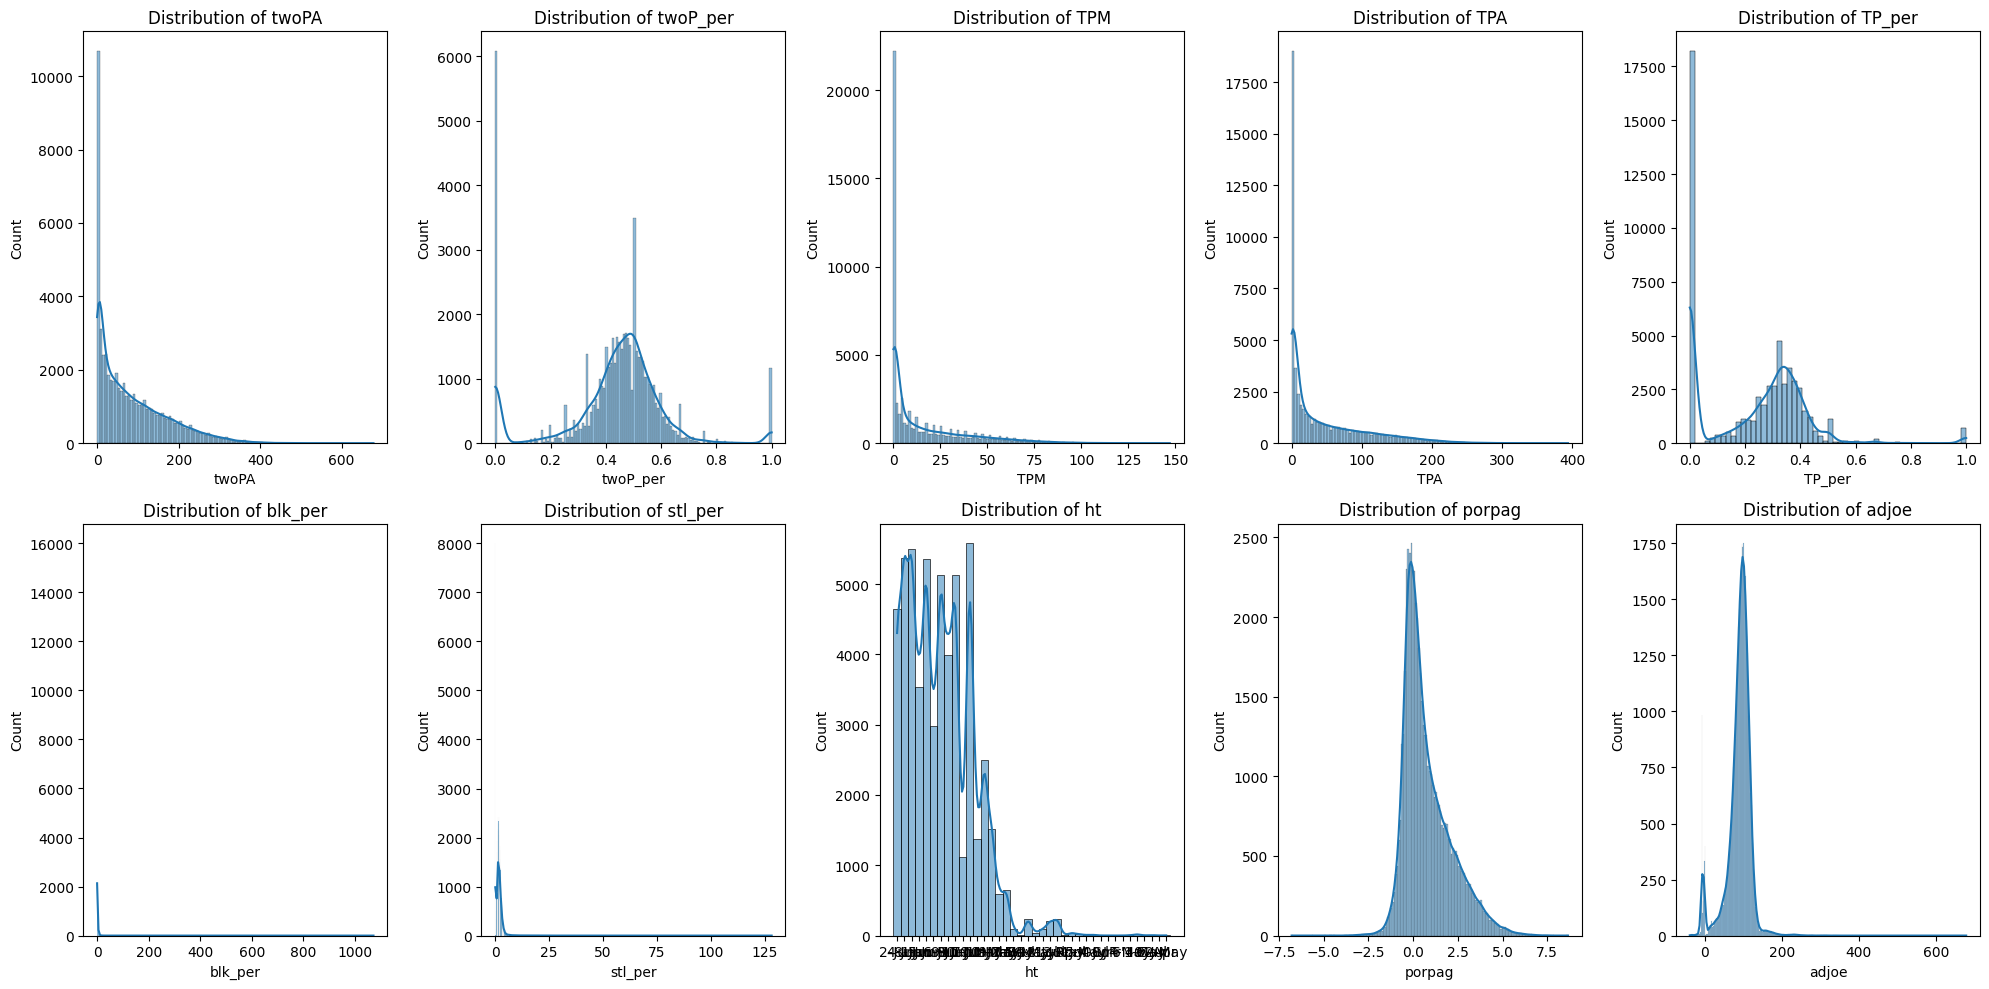

In [42]:
# Second group of numeric features
second_group_features = numeric_features[10:]

plt.figure(figsize=(20, 10))
for i, feature in enumerate(second_group_features, 1):
    plt.subplot(2, 5, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

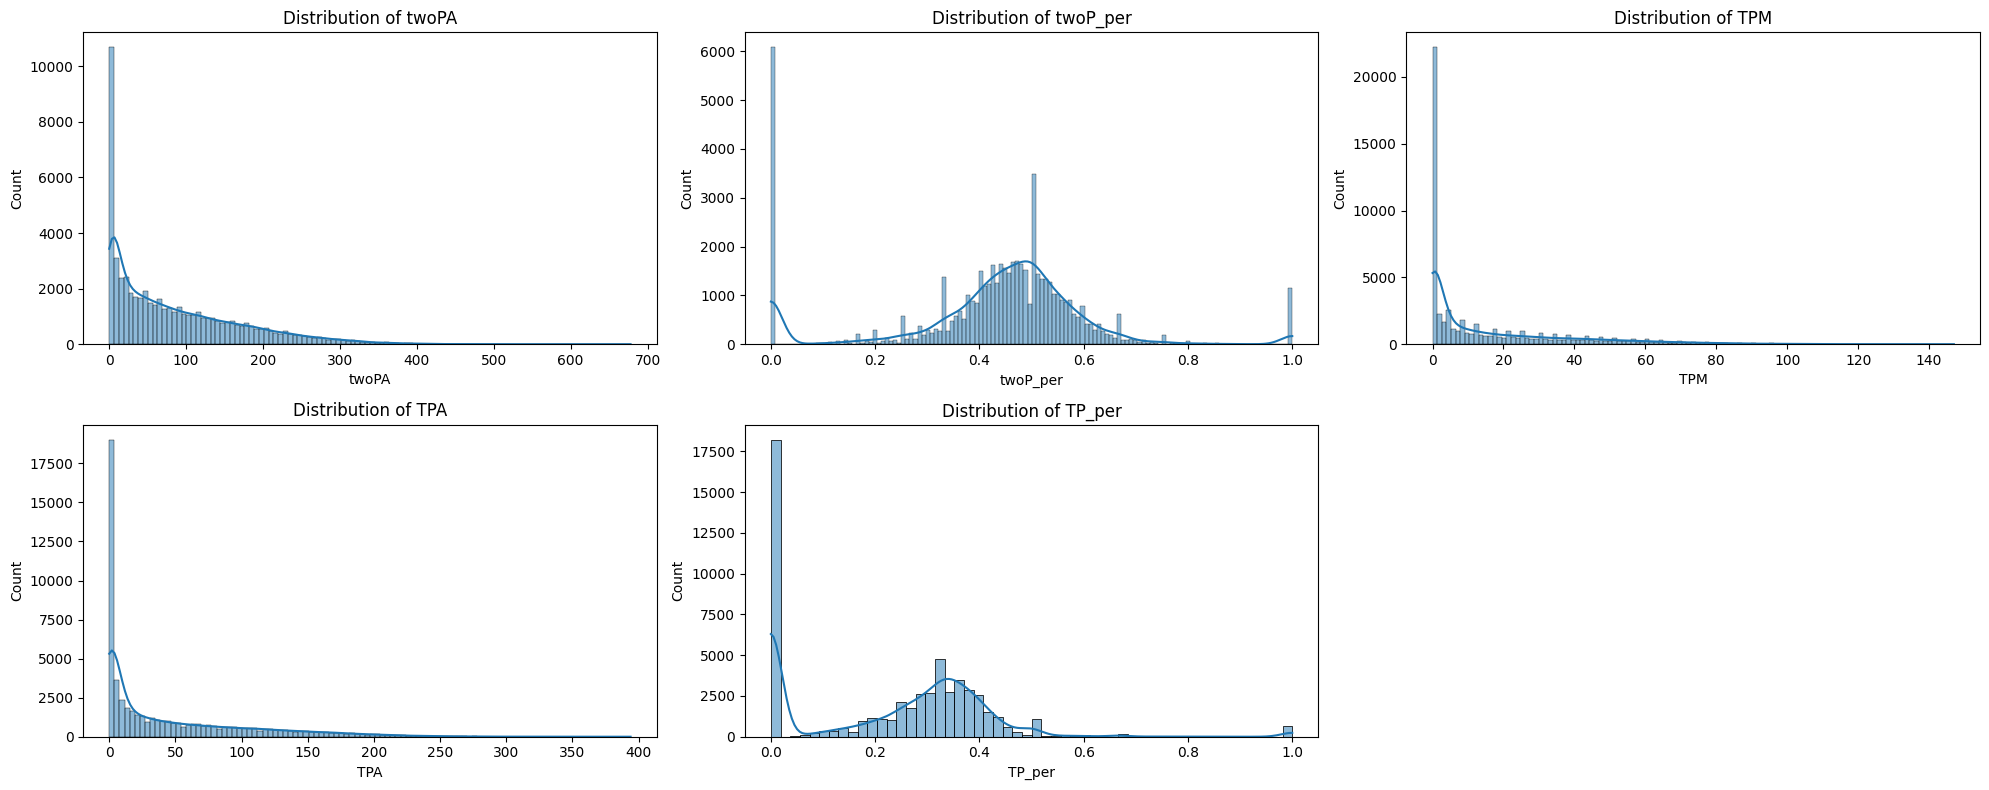

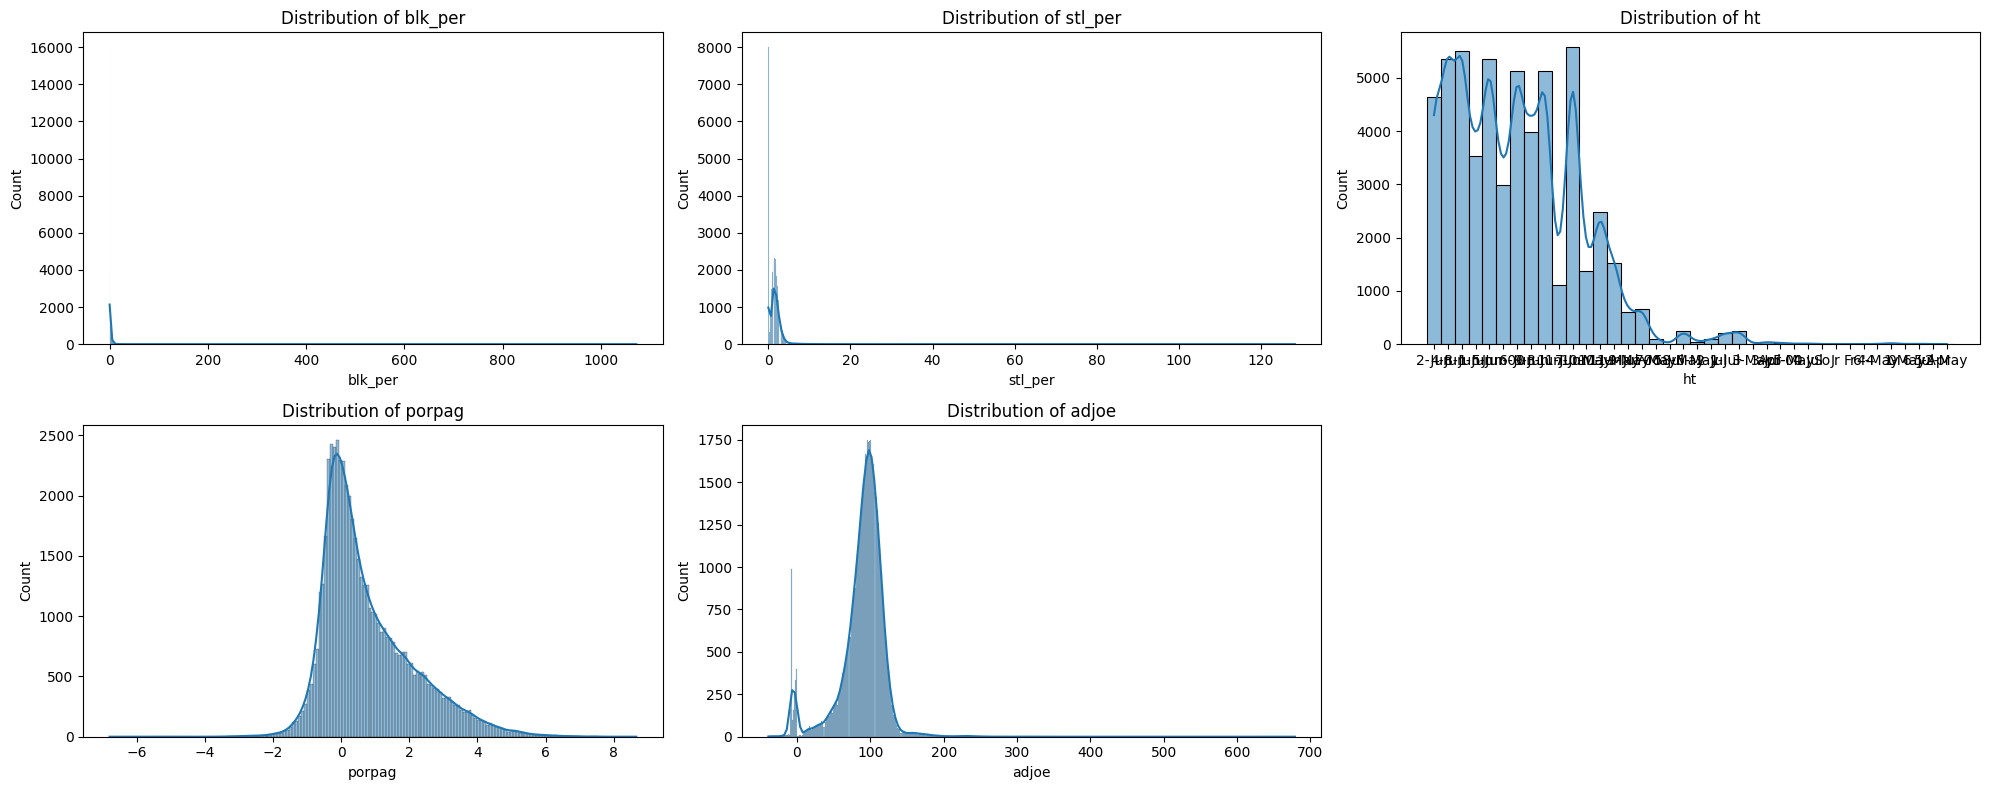

In [37]:
# Splitting second group into two smaller groups
second_group_features = numeric_features[10:15]
third_group_features = numeric_features[15:]

# Second group of numeric features
plt.figure(figsize=(20, 8))
for i, feature in enumerate(second_group_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Third group of numeric features
plt.figure(figsize=(20, 8))
for i, feature in enumerate(third_group_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

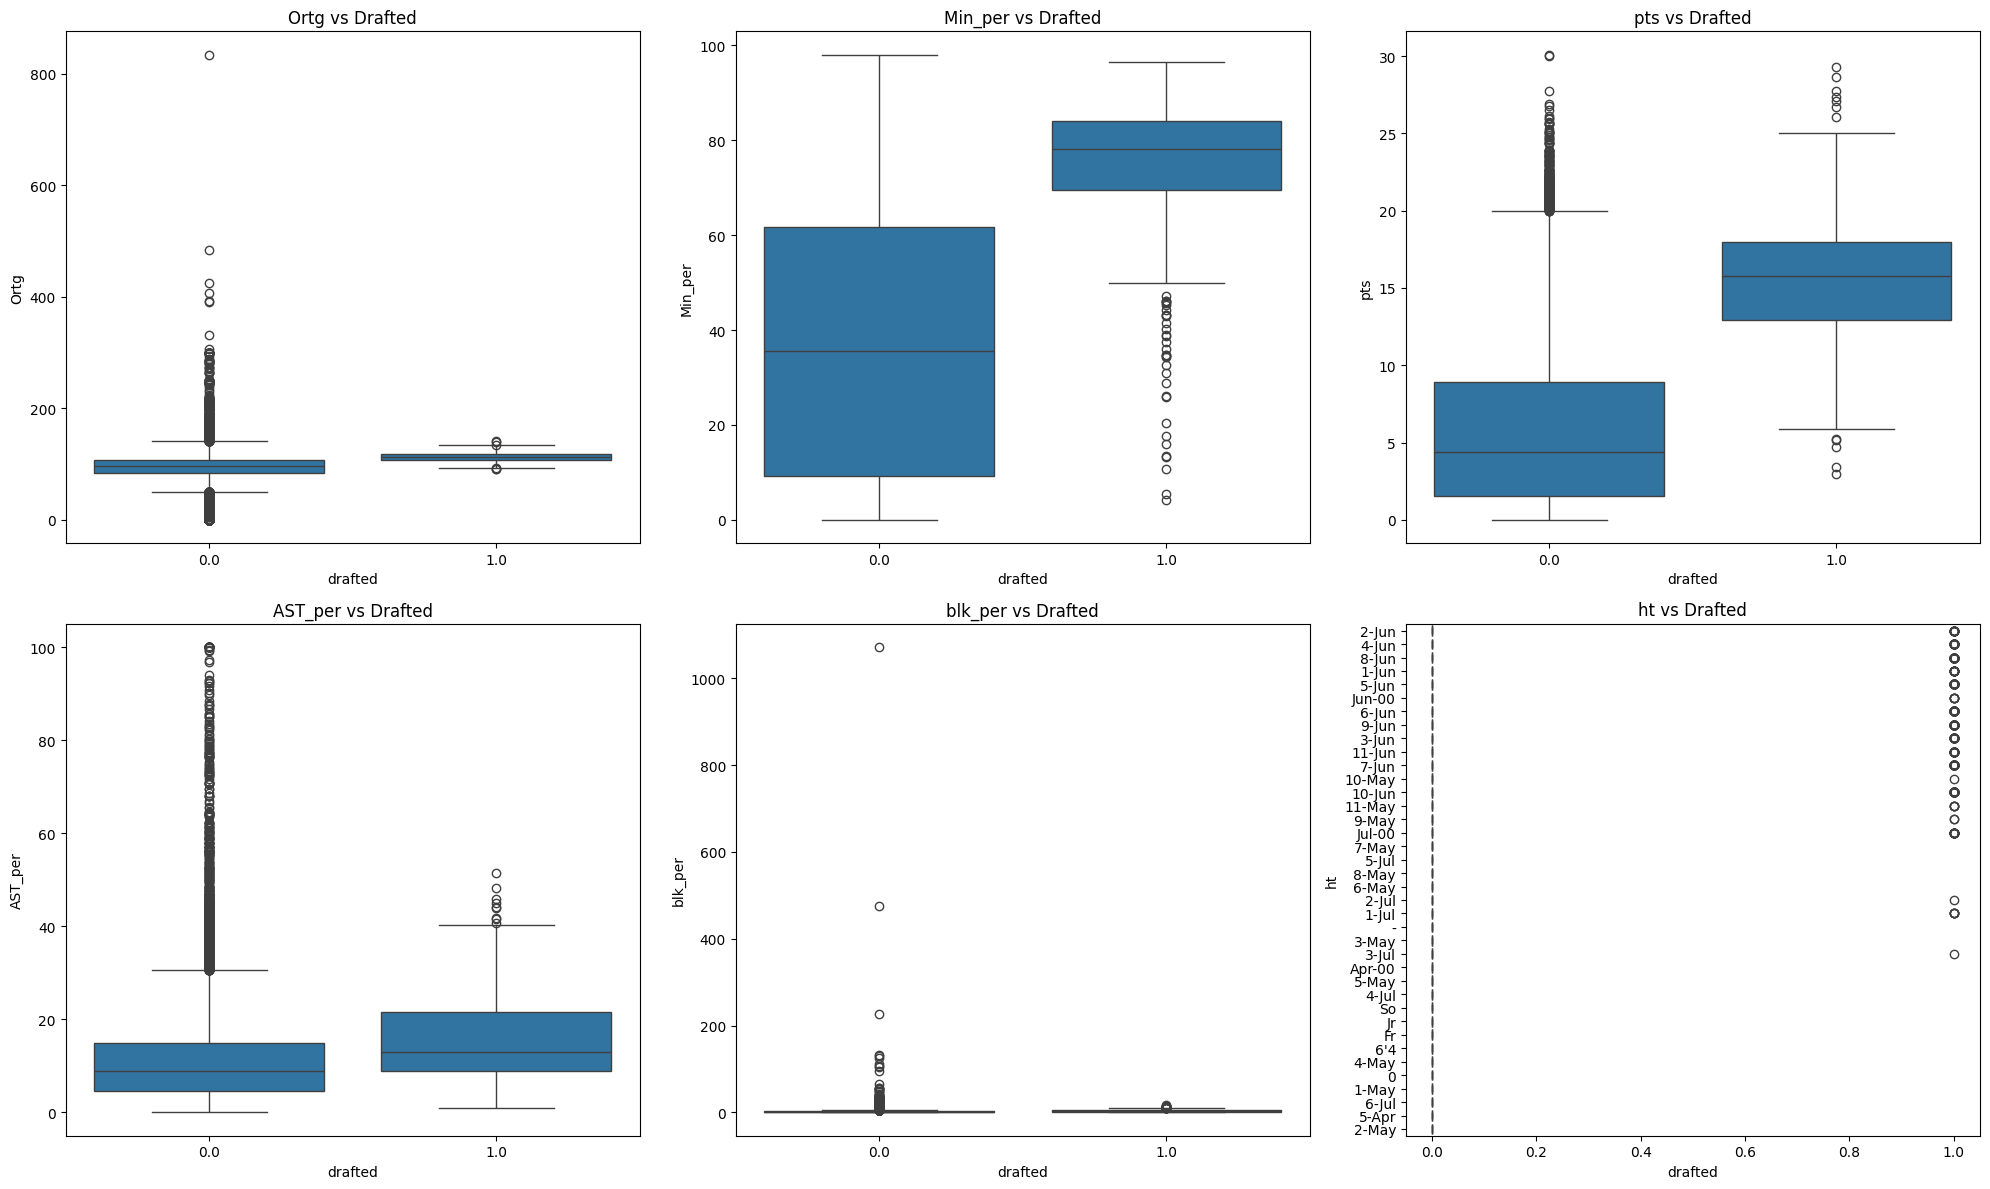

In [40]:
# 5. Relationship Between Key Features and Target (drafted)
key_features = ['Ortg', 'Min_per', 'pts', 'AST_per', 'blk_per', 'ht']

plt.figure(figsize=(20, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='drafted', y=feature, data=df)
    plt.title(f'{feature} vs Drafted')
plt.tight_layout()
plt.show()


### 5. Prepare Data

In [63]:
df_cleaned = df.copy()

### 6. Split Dataset

In [64]:
y_train = df_cleaned.pop('drafted')
X_train = df_cleaned

### 7. Baseline Model

In [74]:
y_central = y_train.mode()
y_base = np.full(y_train.shape[0], y_central)

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [89]:
train_perf = classification_report(y_train, y_base)
print(train_perf)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55555
         1.0       0.00      0.00      0.00       536

    accuracy                           0.99     56091
   macro avg       0.50      0.50      0.50     56091
weighted avg       0.98      0.99      0.99     56091



/Users/rusanvaidya/Library/Caches/pypoetry/virtualenvs/36120amlaat1group6-QZhSvJqp-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rusanvaidya/Library/Caches/pypoetry/virtualenvs/36120amlaat1group6-QZhSvJqp-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rusanvaidya/Library/Caches/pypoetry/virtualenvs/36120amlaat1group6-QZhSvJqp-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined

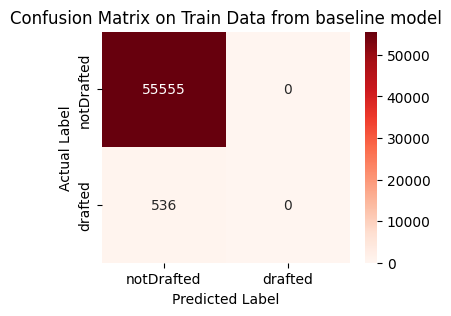

In [92]:
cm = confusion_matrix(y_train, y_base)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=["notDrafted", "drafted"], yticklabels=["notDrafted", "drafted"])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix on Train Data from baseline model')
plt.show()

### 8. Train Machine Learning Model

In [ ]:
model =

### 9. Assess Model Performance

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =